# Exploration 3. 귀여운 고양이 수염 사진 만들기~!

## 1. 고양이 수염과 내 사진을 저장한다. 

$ cd ~/cd aiffel/camera_sticker/Image

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
print("🌫🛸")

🌫🛸


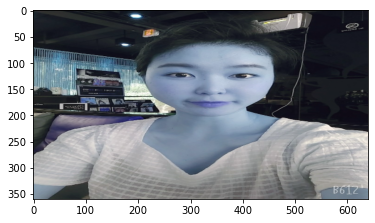

In [2]:
import os
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/image.jpg'
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr, (640, 360))    # 640x360의 크기로 Resize
img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관
plt.imshow(img_bgr)
plt.show()

### 이미지가 옆으로 넓어서 사이즈를 변경해야해!!

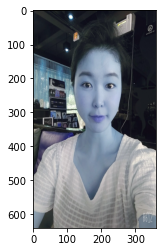

In [3]:
import os
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/image.jpg'
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr, (360, 640))    # 640x360의 크기로 Resize
img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관
plt.imshow(img_bgr)
plt.show()

### 칼라가 이상하지?? 이것도 RGB로 바꾸자~!

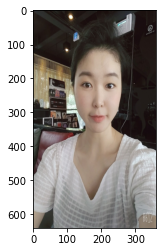

In [4]:
# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요. 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

## 2. 사진에 얼굴 검출 & 랜드마크 설정하기

### 먼저, dlib을 활용해 hog detector를 선언을 해야함.

In [5]:
import dlib
detector_hog = dlib.get_frontal_face_detector()   #- detector 선언
print("🌫🛸")

🌫🛸


### detector를 이용해서 얼굴의 bounding box를 추출해보자.

In [6]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)
print("🌫🛸")

🌫🛸


### 사진에서 얼굴위치 찾기!!

rectangles[[(115, 184) (270, 339)]]


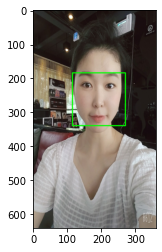

In [7]:
print(dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

### 저장한 랜드마크 모델 불러오기!!

In [8]:
import os
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
print("🌫🛸")

🌫🛸


In [9]:
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


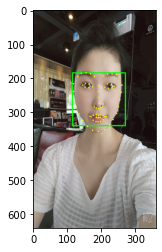

In [10]:
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

## 3. 스티커 적용할 위치 찾기~~!

### 코의 위치를 기준으로 왕관의 위치를 설정했다면, 고양이 수염은 코의 위치에 설정해보자! ㅡLㅡ
내 사진의 코의 위치가 아래와 같이 나옴 

In [11]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # nose center index : 30
    x = landmark[30][0] 
    y = landmark[30][1] - dlib_rect.width()//4
    w = dlib_rect.width()
    h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(193, 274)
(x,y) : (193,235)
(w,h) : (156,156)


### 고양이 사진의 크기도 설정해주기~

In [12]:
import os
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

(156, 156, 3)


### 원본 이미지에 스티커 이미지를 추가하기 위해서 x, y 좌표를 조정하기 (이미지 시작점은 top-left 좌표)

In [13]:
refined_x = x - w //2 # left
refined_y = y - h    # top
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (115,79)


### (음수좌표 제거)

In [14]:
#img_sticker = img_sticker[-refined_y:]
#print (img_sticker.shape)

### top 의 y 좌표는 원본 이미지의 경계 값으로 수정함

In [15]:
refined_y = 200
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (115,200)


### 원본 이미지에 스티커를 적용

In [16]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,img_sticker,sticker_area).astype(np.uint8)

### 사진이 들어간 위치를 확인해볼까~~?

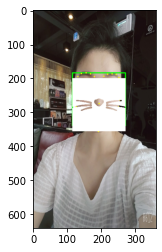

In [17]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

와우... 머리에서 안내려오네~ ^^ 처음엔 수염이 없는줄 .. 
한 시간째 머리에 달린 수염을 내리는데 열중하고 있다.... 

## 4. 고양이수염 스티커 사진에 붙이기 !!

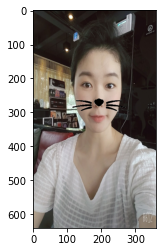

In [18]:
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

## 5. 프로젝트를 마치며 ... 

하... 고양이수염이 머리에 붙어있어서.. 몇일동안 고생한 보람은 있다...  
어렵게 이해해가며 했으나 팀원들에게 설명하기가 힘들다 아직은.. 아직 이게 100% 이것때문이라고 설명을 하지 못하기 때문이다..
사진에 고양이 수염을 장착한 것 처럼 고양이귀, 고양이 손 등등 붙여보고 싶은게 많다.. ㅎㅎ   
어떠한 이벤트 같은거를 준비할 때, 포토샵은 못해도 오히려 이렇게 사진을 붙여보면 재밌겠다!! ^^  
오늘 늦게까지 한 보람이 있다 !! ^^ 그래도 오늘도 완수했다!!! 감사합니다 !!!

## 6. 다른 사진 붙여보기!

### 이번에 도전해볼 사진은..... 사랑하는 우리 조카 방울이 ~ ♡
였으나... 얼굴 인식이 아직은 안되는 나이인지.... ㅠㅠ 내사진으로 재도전 해본다.... !! 

In [19]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
print("🌫🛸")

🌫🛸


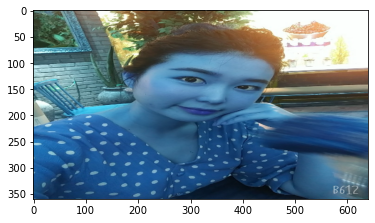

In [20]:
import os
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/image3.jpg'
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr, (640, 360))    # 640x360의 크기로 Resize
img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관
plt.imshow(img_bgr)
plt.show()

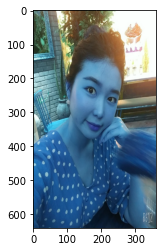

In [21]:
import os
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/image3.jpg'
img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
img_bgr = cv2.resize(img_bgr, (360, 640))    # 640x360의 크기로 Resize
img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관
plt.imshow(img_bgr)
plt.show()

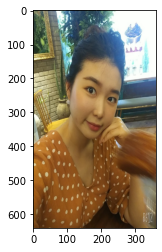

In [22]:
# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요. 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

In [23]:
import dlib
detector_hog = dlib.get_frontal_face_detector()   #- detector 선언
print("🌫🛸")

🌫🛸


In [24]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)
print("🌫🛸")

🌫🛸


rectangles[[(97, 180) (283, 366)]]


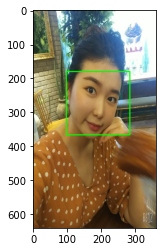

In [25]:
print(dlib_rects)   # 찾은 얼굴영역 좌표

for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [26]:
import os
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)
print("🌫🛸")

🌫🛸


In [27]:
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


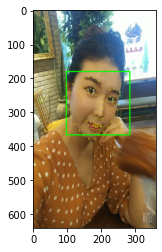

In [28]:
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        cv2.circle(img_show, point, 2, (0, 255, 255), 1) # yellow

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [29]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[30]) # nose center index : 30
    x = landmark[30][0] 
    y = landmark[30][1] - dlib_rect.width()//4
    w = dlib_rect.width()
    h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(199, 306)
(x,y) : (199,260)
(w,h) : (187,187)


In [30]:
import os
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/king.png'
img_sticker = cv2.imread(sticker_path)
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

(187, 187, 3)


In [31]:
refined_x = x - w // 2  # left
refined_y = y - h   # top
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (106,73)


In [32]:
refined_y = 0
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (106,0)


In [33]:
sticker_area = img_show[refined_y:img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,img_sticker,sticker_area).astype(np.uint8)

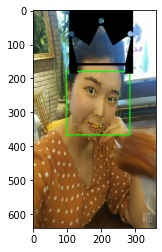

In [34]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

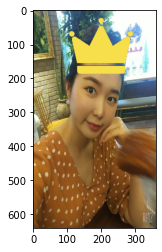

In [35]:
sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==0,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

In [36]:
img_sticker = img_sticker[-refined_y:]
print (img_sticker.shape)

(187, 187, 3)


### 프로젝트를 끝 마치며... 

첫번째 고양이 수염을 붙이는 작업을 몇일만에 끝내고, 새로운 사진을 도전하여 또 몇일만에 끝을 낸다...   
먼저는 우리 귀여운 조카 사진으로 도전을 했는데,,,,,, 끝부분에서 계속 얼굴이 인식이 안되어 결국 사진을 내사진으로 바꿔야만 했다.ㅠㅠ  
살짝 측면의 각도이긴 했으나 사람얼굴로 아직 인식이 안되는 것인지....ㅠㅠ 이모가 미안하다... 지못미...  
결국 살짝 옆으로 기울어져 있는 나의 다른 사진으로 재도전 !!   
과정 중에 많은 에러들이 생겼으나, 인자를 바꿔야하는 문제 외에는 거의 대부분 처음부터 Run을 하면 제대로 되었다.   
점점 jupyter notebook과 친해지고 있는지 다른 에디터보다도 편하게 사용할 수 있는 것 같다...  
프로젝트는 과정 중에는 문제에 부딛힐때마다 힘들다고 느끼지만, 이렇게 완성할 시점에선 항상 재밌다고 느껴진다.. !!   
역시 오늘도 기분좋~~게 마침표..! ^^ 